## Loading the .npy Files

In [91]:
import numpy as np

# x = np.load('./my_data/dtu_v3/processed/scan24/000014_rgb_meta.npy',allow_pickle=True)
# x = np.load('./my_data/nlr_processed_renamed/lv1/scene_stats.npy',allow_pickle=True)
x = np.load('./my_data/nlr_processed_renamed/lv1/000014_rgb_meta.npy',allow_pickle=True)
# print(x.item())
# x = np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy',allow_pickle=True)
print(x.item()['projection'])

[[ 1.0514525  0.         0.         0.       ]
 [ 0.         1.4019368 -0.         0.       ]
 [ 0.         0.        -1.002002  -2.002002 ]
 [ 0.         0.        -1.         0.       ]]


In [90]:
import numpy as np

x = np.load('./my_data/dtu_v3/processed/scan24/000014_rgb_meta.npy',allow_pickle=True)
print(x.item()['projection'])

[[ 3.6154127e+00 -1.4948254e-08 -2.9007317e-02  0.0000000e+00]
 [ 0.0000000e+00  4.8052926e+00  3.1782627e-02  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -1.0002003e+00 -2.0002000e+00]
 [ 0.0000000e+00  0.0000000e+00 -1.0000002e+00  0.0000000e+00]]


In [114]:
np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy',allow_pickle=True).item()['model_matrix']

array([[ 425.0811,    0.    ,    0.    ,   83.5062],
       [   0.    ,  425.0811,    0.    ,   10.002 ],
       [   0.    ,    0.    ,  425.0811, -696.2266],
       [   0.    ,    0.    ,    0.    ,    1.    ]], dtype=float32)

In [117]:
np.load('./my_data/my_dtu/nlr/test/000044_rgb_meta.npy',allow_pickle=True)

array({'name': '', 'view': array([[ 0.9727,  0.0269, -0.2304,  2.9913],
       [-0.0165, -0.9827, -0.1844,  2.9502],
       [-0.2314,  0.1832, -0.9555, -2.9366],
       [ 0.    ,  0.    ,  0.    ,  1.    ]]), 'projection': array([[ 3.6137,  0.    , -0.0314,  0.    ],
       [ 0.    ,  4.8182,  0.0114,  0.    ],
       [ 0.    ,  0.    , -1.006 , -0.0621],
       [ 0.    ,  0.    , -1.    ,  0.    ]]), 'resolution': array([1600, 1200])},
      dtype=object)

In [ ]:
import numpy as np
import json
# loc = './my_data/nlr_processed_renamed/av1/scene_stats.npy'
loc = './my_data/my_dtu/nlr/up/scene_stats.npy'
# x = np.load('./my_data/curls/data/left_new_neg/scene_stats.npy',allow_pickle=True)
# loc = './my_data/my_dtu/nlr/wo_flip_ognpy/scene_stats.npy'
z = np.load(loc,allow_pickle=True)
# y = json.load(open('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/scene.json'))


print(z)
# print(y['center'], y['scale'])


z.item()['pcd_radius'] = 3.0 #x.item()['pcd_radius']/70.0
z.item()['pcd_center'] = np.array([5., 0., 0.]) #x.item()['pcd_center']/70.0
z.item()['camera_radius'] = 0.0
z.item()['camera_intersection'] = np.array([0., 0., 0.])
print(z)
np.save(loc, z, allow_pickle=True)
# from plyfile import PlyData, PlyElement
# y = PlyData.read('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/merged_pcd.ply')
# x = np.load('./my_data/dtu_v3/processed/scan24/merged_pcd_meta.npy',allow_pickle=True)


# print(y['vertex']['x'].shape)

In [ ]:
#DTU

y = np.load('./my_data/dtu_v3/processed/scan24/000000_rgb_meta.npy',allow_pickle=True).item()
# print
# print(y)
M = np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy',allow_pickle=True).item()['model_matrix']
P = y['projection']
V = y['view']


width, height = y['resolution']

fx = P[0, 0] * width / 2.0
fy = P[1, 1] * height / 2.0
cx = (1.0 - P[0, 2]) * width / 2.0
cy = (1.0 + P[1, 2]) * height / 2.0

print('GT: ',fx,fy,cx,cy)

y = json.load(open('./my_data/my_dtu/scan24/camera/000002.json'))

fx1 = fx-y['focal_length']
fy1 = fy-y['focal_length']
cx1, cy1 = y['principal_point']-np.array([cx,cy])
fx = y['focal_length']
fy = y['focal_length']
cx, cy = y['principal_point']

print('MY: ',fx,fy,cx,cy)
print('DF: ',fx1,fy1,cx1,cy1)

In [ ]:
#MY_DTU

y = np.load('./my_data/my_dtu/nlr/w_flip/000010_rgb_meta.npy',allow_pickle=True).item() 
x = np.load('./my_data/my_dtu/nlr/w_flip/scene_stats.npy',allow_pickle=True).item()
# print
c = np.ones(4)
c[0:3] = x['pcd_center']
wc =np.array([1.,1.,1.,1.]) #world center
M = np.eye(4)#np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy',allow_pickle=True).item()['model_matrix']
P = y['projection']
V = y['view']
print('center',c.T)
print('world center',wc)
print('----------------')
print('MODEL MATRIX')
print(M)
print('----------------')
print('VIEW MATRIX')
print(V) 
print('----------------')
print('PROJECTION MATRIX')
print(P)

print('----------------')
# print('VIEW MATRIX')
# print(V)
print('V@wc')
print(V@wc)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
%matplotlib notebook
x = np.load('./my_data/my_dtu/nlr/test/fig.npy',allow_pickle=True).item()

print(type(x))

In [ ]:
import json

y = json.load(open('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/scene.json'))
print(y.keys(),len(y.keys()))

for i in y.keys():
    print(i,':', y[i])

In [ ]:
import numpy as np

x = np.load('./my_data/dtu_v3/processed/scan122/000014_rgb_meta.npy',allow_pickle=True)
# x = np.load('./my_data/nlr_processed_renamed/lv4/000014_rgb_meta.npy',allow_pickle=True)


print(x.item()['name'])
print(x.item()['view'])
print(x.item()['projection'])
print(x.item()['resolution'])
print(x.item()['is_in_world_coords'])
print(x.item()['image_file'])
print(x.item()['depth_file'])
print(x.item()['mask_file'])
print(x.item()['m_pcd_to_original'])
# print(type(x.item()))

In [ ]:
import json
import numpy as np

y = json.load(open('/ubc/cs/research/kmyi/svsamban/research/data-nerfies/curls/camera/left1_000000.json'))
y = json.load(open('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/camera/000001.json'))

In [ ]:
print(y.keys(),len(y.keys()))

print('orientation|\n',np.array(y['orientation']))

print('position|\n',np.array(y['position']))

print('focal_length|\n',np.array(y['focal_length']))

print('principal_point|\n',np.array(y['principal_point']))

print('skew|\n',np.array(y['skew']))

print('pixel_aspect_ratio|\n',np.array(y['pixel_aspect_ratio']))

print('radial_distortion|\n',np.array(y['radial_distortion']))

print('tangential_distortion|\n',np.array(y['tangential_distortion']))

print('image_size|\n',np.array(y['image_size']))

In [ ]:
f = y['focal_length']
ax, ay = y['image_size']
ax = f/ax
ay = f/ay
u0, v0 = y['principal_point']
s = y['skew']

K = np.array([[ax, s, u0, 0],
              [0, ay, v0, 0],
              [0,  0,  1, 0]])


I = np.concatenate((np.array(y['orientation']),np.array([y['position']]).transpose()),axis=-1)
P = K*I # projection matrix
V = np.linalg.inv(np.concatenate((I,np.array([[0,0,0,1]])),axis=0)) # view matrix
 ## TO DO: INCORPORATE TANGENTIAL AND RADIAL DISTORTION

In [ ]:
# import required module
import os
import json


# assign directory
directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/camera'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/meta'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # print(filename)
    # red
    # checking if it is a file
    if os.path.isfile(f):
        file = open(f)
        y = json.load(file)

        f = y['focal_length']
        ax, ay = y['image_size']
        ax = f/ax
        ay = f/ay
        u0, v0 = y['principal_point']
        s = y['skew']

        K = np.array([[ax, s, u0, 0],
                      [0, ay, v0, 0],
                      [0,  0,  1, 0]])


        Rt = np.concatenate((np.array(y['orientation']),np.array([y['position']]).transpose()),axis=-1)
        P = K*Rt # projection matrix  # np.matmul(K,Rt) results in 3x3 atrix :(
        Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        V = np.linalg.inv(Rt) # view matrix
        ## TO DO: incorporate tangential and radial distortion and figure out why p is 4x4 with a -2 iin the last column 
        P = np.concatenate((P,np.array([[0,0,-1,0]])),axis=0)
        P[2,3] = -2.0 # temporary badaid to just check if we can train 
        

        meta = np.array({
            'name': filename[:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(y['image_size'])
        })

        file.close()
        npy_name = os.path.join(location,filename[:-5]+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)

In [ ]:
#check if it looks right

z = np.load(os.path.join(location,'left1_000006_rgb_meta.npy'),allow_pickle=True)
print(z)
print(z.item()['view'])
print(z.item().keys())
print(z.item()['projection'])
print(z.item()['resolution'])
print(type(z.item()))

In [ ]:
import os

folder = "/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/mask/"
for filename in os.listdir(folder):
    dst = f"{filename[:-4]}_mask.png"
    src =f"{folder}{filename}"  # foldername/filename, if .py file is outside folder
    dst =f"{folder}{dst}"
        
    # mv -v /ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/meta/* /ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/data/
    os.rename(src, dst)

In [ ]:
import torch 
import numpy as np
V = np.ones((4,4), dtype=np.float32)
V = np.arange(16).reshape((4,4))
print(V)
V1 = V * np.array([[1],[-1],[-1],[1]]) #* np.transpose(np.array([[1],[-1],[-1],[1]]))
print(V1)
# rot = [[1, 0, 0, 0],#np.array(
#         [0, 0,-1, 0],
#         [0,-1, 0, 0],
#         [0, 0, 0, 1]]#)
# V2 = np.matmul(rot,V)
# print(V2)

In [ ]:
# import required module
import os
import json
import numpy as np


# assign directory
directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/camera/left'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/data/left_new_neg/factory/'
folder = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/data/left_og/'
 
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # print(filename)
    # red
    # checking if it is a file
    if os.path.isfile(f):
        file = open(f)
        y = json.load(file)

        f = y['focal_length']
        ax, ay = y['image_size']
        ax = f/ax
        ay = f/ay
        u0, v0 = y['principal_point']
        s = y['skew']


        # rot = [[1, 0, 0],
        #         [0, 0,-1],
        #         [0,-1, 0]]

        Rt = np.concatenate((np.array(y['orientation']),np.array([y['position']]).transpose()),axis=-1)
        # Rt = np.concatenate((np.array([[-1],[1],[-1]])*np.array(y['orientation']),np.array([y['position']]).transpose()),axis=-1)

        # Rt = np.concatenate((np.matmul(np.array(y['orientation']),rot),np.array([y['position']]).transpose()),axis=-1)
        Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        V = np.linalg.inv(Rt) # view matrix
        # V = np.array([[-1],[-1],[1],[1]])  * V  #* np.transpose(np.array([[-1],[1],[1],[-1]])) #opencv to opengv [[1],[1],[-1],[1]] and [[1],[-1],[1],[1]] doesnt work 
        
        # V = Rt
        # rot = [[1, 0, 0, 0],
        #         [0, 0,-1, 0],
        #         [0,-1, 0, 0],
        #         [0, 0, 0, 1]]
        # V = np.squeeze(np.matmul(rot,V))
            
        width, height = y['image_size']
        fx = f
        fy = f
        cx = u0
        cy = v0
        zfar  = 1e3
        znear = 1
    
        m = np.eye(4, dtype=np.float32)
        m[0][0] = 2.0 * fx / width
        m[0][1] = 0.0
        m[0][2] = 0.0
        m[0][3] = 0.0

        m[1][0] = 0.0
        m[1][1] = 2.0 * fy / height
        m[1][2] = 0.0
        m[1][3] = 0.0

        m[2][0] = 1.0 - 2.0 * cx / width
        m[2][1] = -(1.0 - 2.0 * cy / height)
        m[2][2] = (zfar + znear) / (znear - zfar)
        m[2][3] = -1.0

        m[3][0] = 0.0
        m[3][1] = 0.0
        m[3][2] = 2.0 * zfar * znear / (znear - zfar)
        m[3][3] = 0.0

        P = m.T



        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(y['image_size']),
            # 'is_in_world_coords': True,
            'image_file': filename[6:-5]+'.png',
            'depth_file': '',
            'mask_file': filename[9:-5]+'.png',
            # 'm_pcd_to_original':
            
        })

        file.close()
        npy_name = os.path.join(location,filename[6:-5]+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)
        print(npy_name)

import os

i = 0
for filename in sorted(os.listdir(location)):
    # print(filename)

    if filename[-8:] == "meta.npy":
        print(filename[-8:])
        
        src = src =f"{location}{filename}"
        dst = folder + str(i).zfill(6) + "_rgb_meta.npy"
        os.rename(src, dst)

        i = i+1



In [ ]:
import os


# directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/curls/camera/left'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/'
folder = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/meta/'


i = 0
for filename in sorted(os.listdir(location)):
    # print(filename)

    if filename[-12:] == "rgb_meta.npy":
        print(filename[-8:])
        
        src = src =f"{location}{filename}"
        dst = folder + str(i).zfill(6) + "_rgb_meta.npy"
        os.rename(src, dst)

        i = i+1


In [ ]:
# import required module
import os
import json
import numpy as np


directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/camera'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/inv/'
 


i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # print(filename)
    # red
    # checking if it is a file
    if os.path.isfile(f):
        file = open(f)
        y = json.load(file)

        f = y['focal_length']
        u0, v0 = y['principal_point']
        # ax, ay = y['image_size']
        # ax = f/ax
        # ay = f/ay
        # s = y['skew']


        # rot = [[1, 0, 0],
        #         [0, 0,-1],
        #         [0,-1, 0]]

        Rt = np.concatenate((np.array(y['orientation']),np.array([y['position']]).transpose()),axis=-1)
        # Rt = np.concatenate((np.array([[-1],[1],[-1]])*np.array(y['orientation']),np.array([y['position']]).transpose()),axis=-1)

        # Rt = np.concatenate((np.matmul(np.array(y['orientation']),rot),np.array([y['position']]).transpose()),axis=-1)
        Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        V = Rt #
        V = np.linalg.inv(Rt) # view matrix
        # V = np.array([[-1],[-1],[1],[1]])  * V  #* np.transpose(np.array([[-1],[1],[1],[-1]])) #opencv to opengv [[1],[1],[-1],[1]] and [[1],[-1],[1],[1]] doesnt work 
        
        # V = Rt
        # rot = [[1, 0, 0, 0],
        #         [0, 0,-1, 0],
        #         [0,-1, 0, 0],
        #         [0, 0, 0, 1]]
        # V = np.squeeze(np.matmul(rot,V))
        
        width, height = y['image_size']
        fx = f
        fy = f
        cx = u0
        cy = v0
        zfar  = 1e3
        znear = 1
    
        m = np.eye(4, dtype=np.float32)
        m[0][0] = 2.0 * fx / width
        m[0][1] = 0.0
        m[0][2] = 0.0
        m[0][3] = 0.0

        m[1][0] = 0.0
        m[1][1] = 2.0 * fy / height
        m[1][2] = 0.0
        m[1][3] = 0.0

        m[2][0] = 1.0 - 2.0 * cx / width
        m[2][1] = -(1.0 - 2.0 * cy / height)
        m[2][2] = (zfar + znear) / (znear - zfar)
        m[2][3] = -1.0

        m[3][0] = 0.0
        m[3][1] = 0.0
        m[3][2] = 2.0 * zfar * znear / (znear - zfar)
        m[3][3] = 0.0

        P = m.T



        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(y['image_size']),
            # 'is_in_world_coords': True,
            # 'image_file': filename[6:-5]+'.png',
            # 'depth_file': '',
            # 'mask_file': filename[9:-5]+'.png',
            # 'm_pcd_to_original':
            
        })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)
        print(npy_name)
        i = i+1



In [ ]:
# import required module
import os
import json
import numpy as np

#V2

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/camera'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/no_scene/'
 
y = json.load(open('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/scene.json'))
print(y.keys(),len(y.keys()))
center = y['center']
scale  = y['scale']
zfar  = 1e3
znear = 1

i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)

    # checking if it is a file
    if os.path.isfile(f):
        file = open(f)
        y = json.load(file)


        # VIEW MATRIX

        position = np.array([y['position']])
        orientation = np.array(y['orientation'])

        if center is not None:
            position = position - center
        if scale is not None:
            position = position * scale
        if y['near'] is not None:
            znear  = y['near']
        if y['far'] is not None:
            zfar   = y['far']

        Rt = np.concatenate((orientation,position.transpose()),axis=-1)
        # Rt = np.concatenate((np.array([[-1],[1],[-1]])*np.array(y['orientation']),np.array([y['position']]).transpose()),axis=-1)
        
        Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        
        # PROJECTION MATRIX 
        f = y['focal_length'] * scale
        width, height = y['image_size']
        width = int(round(width * scale))
        height = int(round(height * scale))
        cx, cy = y['principal_point']
        cx = cx * scale
        cy = cy * scale
        s = y['skew']
        fx = f
        fy = f
    
        m = np.eye(4, dtype=np.float32)
        m[0][0] = 2.0 * fx / width
        m[0][1] = 0.0
        m[0][2] = 0.0
        m[0][3] = 0.0

        m[1][0] = 0.0
        m[1][1] = 2.0 * fy / height
        m[1][2] = 0.0
        m[1][3] = 0.0

        m[2][0] = 1.0 - 2.0 * cx / width
        m[2][1] = -(1.0 - 2.0 * cy / height)
        m[2][2] = (zfar + znear) / (znear - zfar)
        m[2][3] = -1.0

        m[3][0] = 0.0
        m[3][1] = 0.0
        m[3][2] = 2.0 * zfar * znear / (znear - zfar)
        m[3][3] = 0.0

        P = m.T



        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(y['image_size']),
            # 'is_in_world_coords': True,
            # 'image_file': filename[6:-5]+'.png',
            # 'depth_file': '',
            # 'mask_file': filename[9:-5]+'.png',
            # 'm_pcd_to_original':
            
        })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)
        # print(npy_name)
        i = i+1



In [ ]:
flipp = np.eye(4)
flipp[0][0] = -1
flipp[1][1] = -1
print(flipp)
np.matmul(flipp,np.ones((4,4))) 
#  np.array([[-1],[-1],[1],[1]])  *np.ones((4,4)) ==

In [ ]:
#check if it looks right
print(location)
z = np.load(os.path.join(location,'left1_000006_rgb_meta.npy'),allow_pickle=True)
# print(z)
# print(z.item()['view'])
# print(z.item().keys())
print(z.item()['projection'])
print(z.item()['mask_file'])
# print(z.item()['resolution'])
# print(type(z.item()))

## renaming og folder 

In [1]:
import os

i = 0
j = 0 
k = 0

location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan55/factory/'
folder = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan55/'


location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/factory/'
folder = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/'


location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1_hd/factory/'
folder = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1_hd/'

for filename in sorted(os.listdir(location)):
    # print(filename)

    if filename[-8:] == "_rgb.jpg":
        # print(filename)
        
        src = src =f"{location}{filename}"
        dst = folder + str(i).zfill(6) + "_rgb.jpg"
        os.rename(src, dst)

        i = i+1

        

# for filename in sorted(os.listdir(location)):
#     # print(filename)

#     if filename[-8:] == "_rgb.jpg":
#         # print(filename)
        

#         src = src =f"{location}{filename}"


#         im1 = Image.open(src)
#         im1.save(src[:-4]+'.png')

#         dst = folder + str(i).zfill(6) + "_rgb.png"
#         os.rename(src[:-4]+'.png', dst)

#         i = i+1



for filename in sorted(os.listdir(location)):
    # print(filename)

    if filename[-9:] == "_mask.png":
        # print(filename)
        
        src = src =f"{location}{filename}"
        dst = folder + str(j).zfill(6) + "_mask.png"
        os.rename(src, dst)

        j = j+1


# for filename in sorted(os.listdir(location)):
#     # print(filename)

#     if filename[-4:] == ".png":
#         # print(filename)
        
#         src = src =f"{location}{filename}"
#         dst = folder + str(j).zfill(6) + "_rgb.png"
#         os.rename(src, dst)

#         j = j+1



for filename in sorted(os.listdir(location)):
    # print(filename)

    if filename[-13:] == "_rgb_meta.npy":
        # print(filename)
        
        src = src =f"{location}{filename}"
        dst = folder + str(k).zfill(6) + "_rgb_meta.npy"
        os.rename(src, dst)

        k = k+1

In [84]:
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/curls/camera'
cam = []
ind = np.zeros(192)
for filename in sorted(os.listdir(location)):
    # print(int(filename[:6]))
    cam.append(int(filename[:6])-1)
print(len(cam), '/',len(ind))
ind[cam] = 1

print(ind)
for i,val in enumerate(ind):
    if val != 1:
        print(i+1)


187 / 192
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
17
132
133
134
155


## OFFICIAL

In [42]:
# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as R


directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'

coords_og = np.load(directory+'points.npy',allow_pickle=True)
y = json.load(open(directory+'scene.json'))
directory = directory+'camera'

scene_center = y['center']
scene_scale  = y['scale']
coords = (coords_og - scene_center) / scene_scale
coords = coords * 10
# print(scene_center, scene_scale)

coord_min = np.min(coords, axis=0)
coord_max = np.max(coords, axis=0)
# print(coord_max)
# print(coord_min)
pcd_center = (coord_min + coord_max) / 2
translation = -pcd_center
diff_center = np.linalg.norm(coords + translation, axis=1)
max_radius = diff_center.max()
scale = 0.99 / max_radius
norm_matrix = np.eye(4, dtype=np.float32)
norm_matrix[0, 0] = scale
norm_matrix[1, 1] = scale
norm_matrix[2, 2] = scale
norm_matrix[:3, 3] = translation * scale

# Model matrix will convert the coords back to the input shape.
model_matrix = np.linalg.inv(norm_matrix)

M = np.array({'model_matrix': model_matrix})
npy_name = os.path.join(location,'model_matrix.npy')
np.save(npy_name, M, allow_pickle=True)
np.set_printoptions(precision=3, suppress=True)
print('model matrix')
print(model_matrix)
# # print(8/scene_scale)
# # red

# M = np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy', allow_pickle=True).item()['model_matrix']
# print(M)
# model_matrix = M#/2.
# model_matrix[3,3] = 1.
# M = np.array({'model_matrix': model_matrix})
# np.save(npy_name, M, allow_pickle=True)
# print('M OG')
# print(M)


i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f)
        y = json.load(file)
        og = np.load('./my_data/dtu_v3/processed/scan24/'+str(i).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()

        ## VIEW MATRIX
        # Rt = np.concatenate((np.array(y['orientation']).T,-1*np.array([y['position']]).transpose()),axis=-1)
        # Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        # Rt = np.linalg.inv(Rt) 
        # V = Rt
        
        T = np.eye(4)
        T[:3,3] = -1*np.array(y['position'])
        R = np.eye(4)
        R[:3,:3] = np.array(y['orientation'])
        V = np.matmul(R,T)
        V = np.linalg.inv(V)


        

        ## PROJECTION MATRIX
        
        width, height = y['image_size']
        fx = y['focal_length']
        fy = y['focal_length'] #* y['pixel_aspect_ratio']
        cx, cy = y['principal_point']
        zfar  = 1e3
        znear = 1
    
        m = np.eye(4, dtype=np.float32)
        m[0][0] = 2.0 * fx / width
        m[0][1] = 0.0
        m[0][2] = 0.0
        m[0][3] = 0.0

        m[1][0] = 0.0
        m[1][1] = 2.0 * fy / height
        m[1][2] = 0.0
        m[1][3] = 0.0

        m[2][0] = 1.0 - 2.0 * cx / width
        m[2][1] = 1.0 - 2.0 * cy / height
        m[2][2] = (zfar + znear) / (znear - zfar)
        m[2][3] = -1.0

        m[3][0] = 0.0
        m[3][1] = 0.0
        m[3][2] = 2.0 * zfar * znear / (znear - zfar)
        m[3][3] = 0.0

        P = m.T


        # use og 
        V = og['view']
        # P = og['projection']
        meta = np.array({
            'name': str(i).zfill(6),
            'view': V,
            'projection': P,
            'resolution': np.array(y['image_size']),
            'is_in_world_coords': True,
            'm_pcd_to_original': np.array([[1],[-1],[-1],[1]]) * np.eye(4)
            })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)
        i = i+1


model matrix
[[ 405.901    0.       0.    -323.489]
 [   0.     405.901    0.     303.119]
 [   0.       0.     405.901  495.471]
 [   0.       0.       0.       1.   ]]


In [393]:
M = np.load('./my_data/my_dtu/nlr/test/model_matrix.npy',allow_pickle=True).item()['model_matrix']
# M = np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy',allow_pickle=True).item()['model_matrix']
print(M)
# print(np.linalg.inv(M))
# np.set_printoptions(precision=4, suppress=True)

[[ 2.8303  0.      0.     -2.2784]
 [ 0.      2.8303  0.     -2.1349]
 [ 0.      0.      2.8303 -3.4897]
 [ 0.      0.      0.      1.    ]]


In [41]:
# print(np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/model_matrix.npy',allow_pickle=True).item())
# print(np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/scene_stats.npy',allow_pickle=True).item())
# np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/000000_rgb_meta.npy',allow_pickle=True).item()
x = np.array(coords_og)
print(np.mean(x,axis=0))
print(scene['center'], scene['scale'])
print(pcd_center)
print(1/ scene['scale'] * my_scale)

[-0.0211  0.0289  0.2858]
[-0.4181632995605469, 0.013493364835408972, 2.1255002620965104] 0.07043218228886713
[   0.       11.2656 -285.5278]
85.18833017826839


## NEW ATTEMPT USING NERFIES PROJECT


In [233]:
# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as R


directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'

my_scale = 4
coords_og = np.load(directory+'points.npy',allow_pickle=True)
scene = json.load(open(directory+'scene.json'))
directory = directory+'camera'

center = np.array(scene['center'])
center = center #* np.array([[1,-1,-1]])

coords_og = []
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        coords_og.append(cam['position'])

coords = np.array(coords_og) #* np.array([[1,-1,-1]])
# coords = (coords - center) / scene['scale'] * my_scale

coord_min = np.min(coords, axis=0)
coord_max = np.max(coords, axis=0)
pcd_center = (coord_min + coord_max) / 2
print('------')
print(pcd_center)
print(center)
print('------')
translation = -pcd_center#/2
# center = center+np.array([0,0,-2])
# center = np.array([-0.19644757, -0.02352956,  1.6378675])
# translation = -center / scene['scale'] * my_scale
diff_center = np.linalg.norm(coords + translation, axis=1)
max_radius = diff_center.max()
scale = 1 / max_radius
print(scale)
# scale = scene['scale']
# print(scale)
M = np.eye(4, dtype=np.float32)
M[0, 0] = scale
M[1, 1] = scale
M[2, 2] = scale
M[:3, 3] = -center + translation * scale # np.array([-0.19644757, -0.02352956,  1.6378675])#
print(M)
M = np.linalg.inv(M)
# M[:3, 3] = -M[:3, 3]

# M = np.eye(4)*400
# M[3,3]=1.
print(center)
print(M)
Mdict = np.array({'model_matrix': M})
npy_name = os.path.join(location,'model_matrix.npy')
np.save(npy_name, Mdict, allow_pickle=True)
# print('warning M not saved')
# all_cam_pos = []
# # iterate over files in that directory
# for filename in sorted(os.listdir(directory)):
#     f = os.path.join(directory, filename)
#     if os.path.isfile(f):
#         file = open(f)
#         cam = json.load(file)
#         all_cam_pos.append(cam['position'])

pos = np.zeros((46,3))

i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        og = np.load('./my_data/dtu_v3/processed/scan24/'+str(i).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()

        ## VIEW MATRIX
        # cam_pos = (np.array([cam['position']+np.array([0,0,-2])])-center) / scene['scale'] * my_scale #- np.min(np.array(all_cam_pos),axis=0)
        cam_pos = np.array([cam['position']])#+np.array([0,0,-2])])
        Rt = np.concatenate((np.array(cam['orientation']).T,cam_pos.transpose()),axis=-1)
        Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        Rt = np.linalg.inv(Rt)*np.array([[1,-1,-1,1]]).T
        V = Rt


        ######################## both works 
        
        T = np.eye(4)
        T[:3,3] = -1*np.array(cam['position'])
        R = np.eye(4)
        R[:3,:3] = np.array(cam['orientation'])
        V = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T
        # V = np.linalg.inv(V)

        ########################

        pos[i,:] = np.linalg.inv(np.matmul(V, M))[..., :3, 3]

        ## PROJECTION MATRIX
        P = np.zeros((4,4))
        fx = cam['focal_length']
        fy = cam['focal_length'] * cam['pixel_aspect_ratio']
        cx = cam['principal_point'][0]
        cy = cam['principal_point'][1]
        w  = cam['image_size'][0]
        h  = cam['image_size'][1]
        zn = scene['near']*scene['scale']
        zf = scene['far']/scene['scale']

        P[0][0] = 2*fx/w 
        P[0][2] = 1 - 2*cx/w 

        P[1][1] = 2*fy/h
        P[1][2] = 2*cy/h - 1

        P[2][2] = (zn+zf)/(zn-zf)
        P[2][3] = (zn*zf)/(zn-zf)*2

        P[3][2] = -1.

        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(cam['image_size']),
            # 'is_in_world_coords': False, #True,
            # 'm_pcd_to_original': np.array([[1],[-1],[-1],[1]]) * np.eye(4)
            })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, og, allow_pickle=True)
        i = i+1



------
[-0.4182 -0.1457  1.2262]
[-0.4182  0.0135  2.1255]
------
0.1656280680470252
[[ 0.1656  0.      0.      0.4874]
 [ 0.      0.1656  0.      0.0106]
 [ 0.      0.      0.1656 -2.3286]
 [ 0.      0.      0.      1.    ]]
[-0.4182  0.0135  2.1255]
[[ 6.0376  0.      0.     -2.9429]
 [ 0.      6.0376  0.     -0.0643]
 [ 0.      0.      6.0376 14.0592]
 [ 0.      0.      0.      1.    ]]


## START OVER LMAO - adjusted for GT

In [59]:
# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as Rot


# directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/'
# location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'


directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/lv1'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1'

my_scale = 4
coords_og = np.load(directory+'/points.npy',allow_pickle=True)
scene = json.load(open(directory+'/scene.json'))
directory = directory+'/camera'

center = np.array(scene['center'])
center = center * np.array([[1,-1,-1]])

# coords_og = []
# # iterate over files in that directory
# for filename in sorted(os.listdir(directory)):
#     f = os.path.join(directory, filename)
#     if os.path.isfile(f):
#         file = open(f)
#         cam = json.load(file)
#         coords_og.append(cam['position'])


cams = []
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        cams.append(cam['position'])


diff_center = np.linalg.norm(cams, axis=1)
max_radius = diff_center.max()
scale = 1 / max_radius
# scale = max_radius

print('scale',scale)

Ry = Rot.from_euler('xyz', [-10, -20, -15], degrees=True)
coords = np.array(coords_og)
# coords = coords @ Ry.as_matrix()
coords = coords * np.array([[1,-1,-1]])
coords = (coords - center) #*1.5 #/(1+ scene['scale']) #* my_scale
coords = coords *1.5

coord_min = np.min(coords, axis=0)
coord_max = np.max(coords, axis=0)
pcd_center = (coord_min + coord_max) / 2
translation = -pcd_center#* np.array([[-1,-1,-1]])
diff_center = np.linalg.norm(coords + translation, axis=1)
max_radius = diff_center.max()
scale = 1 / max_radius
print('scale',scale)
M = np.eye(4, dtype=np.float32)
M[0, 0] = scale
M[1, 1] = scale
M[2, 2] = scale
M[:3, 3] = np.array([0,0,1.5]) #translation * scale * 2

print(M)

M = np.linalg.inv(M)

print(M)
Mdict = np.array({'model_matrix': M})
npy_name = os.path.join(location,'model_matrix.npy')
np.save(npy_name, Mdict, allow_pickle=True)

i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        og = np.load('./my_data/dtu_v3/processed/scan24/'+str(i).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()

        ## VIEW MATRIX
        # # cam_pos = (np.array([cam['position']+np.array([0,0,-2])])-center) / scene['scale'] * my_scale #- np.min(np.array(all_cam_pos),axis=0)
        # cam_pos = np.array([cam['position']])#+np.array([0,0,-2])])
        # Rt = np.concatenate((np.array(cam['orientation']).T,cam_pos.transpose()),axis=-1)
        # # Rt = np.concatenate((np.array(cam['orientation']),cam_pos.transpose()),axis=-1)
        # Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        # Rt = np.linalg.inv(Rt)*np.array([[1,-1,-1,1]]).T
        # V = Rt


        ######################## both works 
        # Ry = Rot.from_euler('xyz', [0, -10, -15], degrees=True)
        
        T = np.eye(4)
        T[:3,3] = (-1*np.array(cam['position'])) @ Ry.as_matrix()
        T[:3,3] = T[:3,3]*np.array([[1,-1,-1]])
        R = np.eye(4)
        R[:3,:3] = np.array(cam['orientation']) @ Ry.as_matrix()
        R[:3,:3] = R[:3,:3]*np.array([[1,-1,-1]])
        V = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T
        V = V 

        ########################

        # pos[i,:] = np.linalg.inv(np.matmul(V, M))[..., :3, 3]

        ## PROJECTION MATRIX
        P = np.zeros((4,4))
        fx = cam['focal_length']
        fy = cam['focal_length'] * cam['pixel_aspect_ratio']
        cx = cam['principal_point'][0]
        cy = cam['principal_point'][1]
        w  = cam['image_size'][0]
        h  = cam['image_size'][1]
        zn = scene['near']*scene['scale']
        zf = scene['far']/scene['scale']

        P[0][0] = 2*fx/w 
        P[0][2] = 1 - 2*cx/w 

        P[1][1] = 2*fy/h
        P[1][2] = 2*cy/h - 1

        P[2][2] = (zn+zf)/(zn-zf)
        P[2][3] = (zn*zf)/(zn-zf)*2

        P[3][2] = -1.

        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(cam['image_size'])
            })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)
        i = i+1



scale 0.1507508284699506
scale 0.04419883381134974
[[0.04419883 0.         0.         0.        ]
 [0.         0.04419883 0.         0.        ]
 [0.         0.         0.04419883 1.5       ]
 [0.         0.         0.         1.        ]]
[[ 22.625032   0.         0.         0.      ]
 [  0.        22.625032   0.         0.      ]
 [  0.         0.        22.625032 -33.937546]
 [  0.         0.         0.         1.      ]]


In [53]:
from PIL import Image

image = Image.open('/ubc/cs/research/kmyi/svsamban/research/data-nerfies/curls/rgb/4x/left1_000093.png')

# summarize some details about the image

print(image.format)

print(image.size)

PNG
(612, 816)


In [3]:
19066+1196+165 

20427

In [75]:
# resizing nerfies masks and rgb
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls'
for file in sorted(os.listdir(location)):
    f_img = location+"/"+file
    # if f_img[-4:] == '.png':
    #     print(f_img)
    if os.path.isfile(f_img) and file[-4:] == '.png':
        # print(file)
        img = Image.open(f_img)
        # img = img.resize((600,800))
        # print(img.size)
        # img.save(f_img)



## WO ROTATION i.e. plain


1
scale 0.2239416892489054
[[ 0.22394168  0.          0.         -0.23869738]
 [ 0.          0.22394168  0.         -0.41735676]
 [ 0.          0.          0.22394168  0.90237534]
 [ 0.          0.          0.          1.        ]]
[[ 4.4654484  0.         0.         1.0658908]
 [ 0.         4.4654484  0.         1.863685 ]
 [ 0.         0.         4.4654484 -4.0295105]
 [ 0.         0.         0.         1.       ]]
[[ 4.4654484  0.         0.         1.0658908]
 [ 0.         4.4654484  0.         1.863685 ]
 [ 0.         0.         4.4654484 -4.0295105]
 [ 0.         0.         0.         1.       ]]


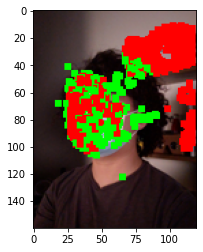

In [277]:
# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as Rot

use_points = True
# use_points = False

use_mask = True
# use_mask = False
view = 1

# directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/scan24'
# location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test24'

# directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/scan55'
# location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test55'

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/curls'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls'

# directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/lv1'
# location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1'

directory_cam = directory+'/camera'

## USING POINTS.NPY
if use_points:
    coords_og = np.load(directory+'/points.npy',allow_pickle=True)
    scene = json.load(open(directory+'/scene.json'))


    if use_mask:
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg
        print(view)
        file = open(directory_cam+'/'+str(view+1).zfill(6)+'.json')
        cam = json.load(file)
        coords_filtered = []

        points = coords_og
        points = points.reshape((-1, 3))
        translated_points = points - cam['position']
        local_points = (np.matmul(cam['orientation'], translated_points.T)).T
        x = local_points[..., 0] / local_points[..., 2]
        y = local_points[..., 1] / local_points[..., 2]
        r2 = x**2 + y**2
        distortion = 1.0 + r2 * (
            cam['radial_distortion'][0] + r2 *
            (cam['radial_distortion'][1] + cam['radial_distortion'][2] * r2))
        x_times_y = x * y
        x = (
            x * distortion + 2.0 * cam['tangential_distortion'][0] * x_times_y +
            cam['tangential_distortion'][1] * (r2 + 2.0 * x**2))
        y = (
            y * distortion + 2.0 * cam['tangential_distortion'][1] * x_times_y +
            cam['tangential_distortion'][0] * (r2 + 2.0 * y**2))
        pixel_x = cam['focal_length'] * x + cam['skew'] * y + cam['principal_point'][0]
        pixel_y = cam['focal_length'] * cam['pixel_aspect_ratio'] * y + cam['principal_point'][1]

        pixels = np.stack([pixel_x, pixel_y], axis=-1)

        # mask = mpimg.imread(directory+'/rgb/mask/'+str(view+1).zfill(6)+'.png')
        # mask = np.sum(mask,axis=-1)/3.0
        mask = mpimg.imread(directory+'/rgb/mask/'+str(view+1).zfill(6)+'_mask.png')
        im = mpimg.imread(directory+'/rgb/1x/'+str(view+1).zfill(6)+'.png')
        shape = mask.shape
        scale = 5.0
        mask = np.array(Image.fromarray((mask*255).astype(np.uint8)).resize((int(shape[1]/scale),int(shape[0]/scale))))
        im = np.array(Image.fromarray((im*255).astype(np.uint8)).resize((int(shape[1]/scale),int(shape[0]/scale))))
        bad = 0
        for i in range(len(pixels)):
            x1 = int(pixels[i,1]/scale)
            x2 = int(pixels[i,0]/scale)
            if True:#i == 3000:
                if x1 < mask.shape[0] and x2 < mask.shape[1] and x1 > -1 and x2 > -1:
                    if mask[x1,x2]>5:
                        mask[x1,x2] = 0
                        im[x1-5:x1,x2-5:x2,:] = [0,255,0]
                        # print('in')
                        coords_filtered.append(coords_og[i])
                    else:
                        mask[x1,x2] = 1
                        im[x1-5:x1,x2-5:x2,:] = [255,0,0]
                        # print('out')
                else:
                    bad = bad + 1
                    pass
        plt.imshow(mask)
        plt.imshow(im)
    else:
        coords_filtered = coords_og

    center = np.array(scene['center'])
    center = center * np.array([[1,-1,-1]])
    Ry = Rot.from_euler('xyz', [0, 0, 0], degrees=True)
    coords = np.array(coords_filtered)
    coords = coords * np.array([[1,-1,-1]])
    coords = (coords - center) 

    coord_min = np.min(coords, axis=0)
    coord_max = np.max(coords, axis=0)
    pcd_center = (coord_min + coord_max) / 2
    translation = -pcd_center
    diff_center = np.linalg.norm(coords + translation, axis=1)
    max_radius = diff_center.max()
    scale = 1 / max_radius
    print('scale',scale)
    M = np.eye(4, dtype=np.float32)
    M[0, 0] = scale
    M[1, 1] = scale
    M[2, 2] = scale
    M[:3, 3] = translation * scale 

    print(M)

    M = np.linalg.inv(M)
    print(M)

else:
## USING CAMS
    cams = []
    for filename in sorted(os.listdir(directory_cam)):
        f = os.path.join(directory_cam, filename)
        if os.path.isfile(f):
            file = open(f)
            cam = json.load(file)
            cams.append(cam['position'])
    cams = np.array(cams)
    scale = 2/np.max(np.max(cams,axis=0)-np.min(cams,axis=0))
    cams = cams*scale
    translation = np.array(np.array([0,0,1]) - np.mean(cams,axis=0))
    M[0, 0] = scale
    M[1, 1] = scale
    M[2, 2] = scale
    M[:3, 3] = translation 
    print(M)
    M = np.linalg.inv(M)


print(M)
Mdict = np.array({'model_matrix': M})
npy_name = os.path.join(location,'model_matrix.npy')
np.save(npy_name, Mdict, allow_pickle=True)


all_cam_pos = []
wld_cam_pos = []
i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory_cam)):
    f = os.path.join(directory_cam, filename)
    # print(f, '---', os.path.isfile(f), '---', open(f))
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)

        

        ## VIEW MATRIX
        T = np.eye(4)
        T[:3,3] = (-1*np.array(cam['position']))
        T[:3,3] = T[:3,3]*np.array([[1,-1,-1]])
        R = np.eye(4)
        R[:3,:3] = np.array(cam['orientation']) 
        R[:3,:3] = R[:3,:3]*np.array([[1,-1,-1]])
        V = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T


        ## PROJECTION MATRIX
        P = np.zeros((4,4))
        fx = cam['focal_length']
        fy = cam['focal_length'] * cam['pixel_aspect_ratio']
        cx = cam['principal_point'][0]
        cy = cam['principal_point'][1]
        w  = cam['image_size'][0]
        h  = cam['image_size'][1]
        zn = scene['near']*scene['scale']
        zf = scene['far']/scene['scale']

        P[0][0] = 2*fx/w 
        P[0][2] = 1 - 2*cx/w 

        P[1][1] = 2*fy/h
        P[1][2] = 2*cy/h - 1

        P[2][2] = (zn+zf)/(zn-zf)
        P[2][3] = (zn*zf)/(zn-zf)*2

        P[3][2] = -1.

        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(cam['image_size'])
            })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)

        # shutil.copy(directory+'/rgb/1x/'+filename[:-5]+'.png', os.path.join(location,str(i).zfill(6)+'_rgb.png'))
        # shutil.copy(directory+'/rgb/mask/'+filename[:-5]+'.png', os.path.join(location,str(i).zfill(6)+'_mask.png'))
        i = i+1


In [83]:
M = np.array(np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1-lowres/model_matrix.npy', allow_pickle=True).item()['model_matrix'].cpu())
np.save('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1-lowres/model_matrix.npy', {'model_matrix': M}, allow_pickle=True)

## RETRY W NLR 


In [104]:
# import required module
import os
import json
import numpy as np
import shutil
from scipy.spatial.transform import Rotation as Rot


# directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/lv1'
# location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1'
directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/scan55'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test55'


scene = json.load(open(directory+'/scene.json'))
directory_cam = directory+'/camera'


cams = []
for filename in sorted(os.listdir(directory_cam)):
    f = os.path.join(directory_cam, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        cams.append(cam['position'])
cams = np.array(cams)
scale = 2/np.max(np.max(cams,axis=0)-np.min(cams,axis=0))
cams = cams*scale
translation = np.array(np.array([0,0,1]) - np.mean(cams,axis=0))
M[0, 0] = scale
M[1, 1] = scale
M[2, 2] = scale
M[:3, 3] = translation 

print(M)

M = np.linalg.inv(M)

print(M)
Mdict = np.array({'model_matrix': M})
npy_name = os.path.join(location,'model_matrix.npy')
np.save(npy_name, Mdict, allow_pickle=True)


all_cam_pos = []
wld_cam_pos = []
i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory_cam)):
    f = os.path.join(directory_cam, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        

        ## VIEW MATRIX
        T = np.eye(4)
        T[:3,3] = (-1*np.array(cam['position']))
        T[:3,3] = T[:3,3]*np.array([[1,-1,-1]])
        R = np.eye(4)
        R[:3,:3] = np.array(cam['orientation']) 
        R[:3,:3] = R[:3,:3]*np.array([[1,-1,-1]])
        V = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T


        # Determine ray origin from camera position.
        model_view_matrix = V @ M
        cam_pos = np.linalg.inv(model_view_matrix)[..., :3, 3]
        wld_cam_pos.append(cam_pos)
        all_cam_pos.append(cam['position'])


        ## PROJECTION MATRIX
        P = np.zeros((4,4))
        fx = cam['focal_length']
        fy = cam['focal_length'] * cam['pixel_aspect_ratio']
        cx = cam['principal_point'][0]
        cy = cam['principal_point'][1]
        w  = cam['image_size'][0]
        h  = cam['image_size'][1]
        zn = scene['near']*scene['scale']
        zf = scene['far']/scene['scale']

        P[0][0] = 2*fx/w 
        P[0][2] = 1 - 2*cx/w 

        P[1][1] = 2*fy/h
        P[1][2] = 2*cy/h - 1

        P[2][2] = (zn+zf)/(zn-zf)
        P[2][3] = (zn*zf)/(zn-zf)*2

        P[3][2] = -1.

        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(cam['image_size'])
            })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)

        shutil.copy(directory+'/rgb/1x/'+filename[:-5]+'.png', os.path.join(location,str(i).zfill(6)+'_rgb.png'))
        shutil.copy(directory+'/rgb/mask/'+filename[:-5]+'.png', os.path.join(location,str(i).zfill(6)+'_mask.png'))
        i = i+1



[[ 0.1917595   0.          0.         -0.03494193]
 [ 0.          0.1917595   0.         -0.01338334]
 [ 0.          0.          0.1917595   0.9824553 ]
 [ 0.          0.          0.          1.        ]]
[[ 5.2148657   0.          0.          0.18221746]
 [ 0.          5.2148657   0.          0.06979232]
 [ 0.          0.          5.2148657  -5.1233726 ]
 [ 0.          0.          0.          1.        ]]


In [99]:
directory+'/rgb/1x/'+filename[:-5]+'.png', os.path.join(location,str(i).zfill(6)+'_rgb.png')

('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/scan55/rgb/1x/000049.png',
 '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test55/000046_rgb.png')

In [72]:
x = np.array(all_cam_pos)
scale = 2/np.max(np.max(x,axis=0)-np.min(x,axis=0))
x = x*scale
# x = np.array(wld_cam_pos)
print(np.mean(x,axis=0))
print(np.max(x,axis=0)-np.min(x,axis=0))
print()

[0.09117215 0.01739123 0.034131  ]
[2.         0.65041445 0.945663  ]



In [136]:
cam_pos = np.array([cam['position']])#+np.array([0,0,-2])])
Rt = np.concatenate((np.array(cam['orientation']).T,cam_pos.transpose()),axis=-1)
# Rt = np.concatenate((np.array(cam['orientation']),cam_pos.transpose()),axis=-1)
Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
Rt = np.linalg.inv(Rt)*np.array([[1,-1,-1,1]]).T
V1 = Rt


######################## both works 

T = np.eye(4)
T[:3,3] = -1*np.array(cam['position'])
R = np.eye(4)
R[:3,:3] = np.array(cam['orientation'])
V2 = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T

print(np.abs(V1-V2)<0.00001)
print(V2@ np.linalg.inv(V1))

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ 1. -0.  0.  0.]
 [-0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]


array([[-2.7338,  1.6844,  5.6801],
       [-3.3537,  1.9806,  4.6576],
       [-3.3384,  1.9932,  4.6538],
       ...,
       [-2.3131,  3.6531,  5.6404],
       [-2.0549,  3.685 ,  5.4472],
       [-2.9881,  1.6676,  5.1891]])

In [85]:
# scene['center']* np.array([[1,-1,-1]])
# np.ones((4,4))*np.array([[1,-1,-1,1]]).T*np.array([[1,-1,-1,1]]).T
M= np.eye(4)*0.0023525
M[3][3] = 1.
print(M)
print(np.linalg.inv(M))

[[0.0024 0.     0.     0.    ]
 [0.     0.0024 0.     0.    ]
 [0.     0.     0.0024 0.    ]
 [0.     0.     0.     1.    ]]
[[425.0797   0.       0.       0.    ]
 [  0.     425.0797   0.       0.    ]
 [  0.       0.     425.0797   0.    ]
 [  0.       0.       0.       1.    ]]


In [55]:
import torch
import numpy as np
all_cam_pos = []
wld_cam_pos = []
# iterate over files in that directory
i = 0
directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1-lowres/'
model_matrix = np.array(np.load(directory+'model_matrix.npy',allow_pickle=True).item()['model_matrix'].cpu())

for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and f[-8:]=='meta.npy':

        og = np.load(directory+str(i).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()
        V = og['view']
        all_cam_pos.append(np.linalg.inv(V)[..., :3, 3]) # np.linalg.inv(V)
        # all_cam_pos.append(V[..., :3, 3])
        model_view_matrix = V @ model_matrix
        # print(V)
        # print(np.linalg.inv(V))
        # Determine ray origin from camera position.
        cam_pos = np.linalg.inv(model_view_matrix)[..., :3, 3]
        wld_cam_pos.append(cam_pos)
        i = i + 1


y = np.array(wld_cam_pos)
# print(y)
print(np.mean(y,axis=0))
print(np.var(y,axis=0))
y = np.array(all_cam_pos)
print('---')
print(np.mean(y,axis=0),'mean')
print((np.min(y, axis=0) + np.max(y, axis=0)) / 2, 'pcdcenter')
print(1 / np.linalg.norm(coords -((np.min(y, axis=0) + np.max(y, axis=0)) / 2), axis=1).max(),'scale')
print(np.max(y,axis=0),'max')
print(np.min(y,axis=0),'min')
print(np.sqrt(np.var(y,axis=0)),'var')
# print((np.min(coords, axis=0) + np.max(coords, axis=0)) / 2)
        

[0.06811313 0.08063759 0.96688032]
[0.53214202 0.05494728 0.00819003]
---
[-0.04483725  0.25270725 -0.11223541] mean
[-0.00509362  0.17666781  0.12211903] pcdcenter
0.9662998877171698 scale
[6.81129264 2.27940784 1.17395857] max
[-6.82147987 -1.92607223 -0.92972051] min
[4.41595091 1.4190038  0.54783931] var


In [370]:
import torch
all_cam_pos = []
wld_cam_pos = []
model_matrix = M 

# model_matrix = np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy',allow_pickle=True).item()['model_matrix']

# model_matrix = np.eye(4)*400
# # translation = np.array(scene['center']) * 400
# # translation = -pcd_center #*scale #*400 #/ scene['scale'] * my_scale
# # model_matrix[:3, 3] = translation
# model_matrix[3,3] = 1
# model_matrix[2,3] = -400
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        ## VIEW MATRIX
        # cam_pos = (np.array([cam['position']])-center) / scene['scale'] * my_scale #- np.min(np.array(all_cam_pos),axis=0)
        cam_pos = np.array([cam['position']])#*100
        
        all_cam_pos.append(cam_pos)

        Rt = np.concatenate((np.array(cam['orientation']).T,cam_pos.transpose()),axis=-1)
        Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        Rt = np.linalg.inv(Rt)*np.array([[1,-1,-1,1]]).T
        V = Rt
        model_view_matrix = V @ model_matrix

        # Determine ray origin from camera position.
        cam_pos = np.linalg.inv(model_view_matrix)[..., :3, 3]
        wld_cam_pos.append(cam_pos)


y = np.array(wld_cam_pos)
y = np.array(all_cam_pos)
print(np.mean(y,axis=0))
print(np.sqrt(np.var(y,axis=0)))
print(model_matrix)

[[-0.0211  0.0289  0.2858]]
[[2.6412 2.0104 1.7403]]
[[ 2.8303  0.      0.     -2.2784]
 [ 0.      2.8303  0.     -2.1349]
 [ 0.      0.      2.8303 -3.4897]
 [ 0.      0.      0.      1.    ]]


In [374]:
np.set_printoptions(suppress=True)
y
y = all_cam_pos
y = wld_cam_pos
# y = coords_og
print(np.mean(y,axis=0))
print(np.sqrt(np.var(y,axis=0)))

[0.7976 0.7645 1.334 ]
[0.9332 0.7103 0.6149]


In [384]:
y
print(np.min(y, axis=0))
print(np.max(y, axis=0))
print(np.max(np.abs(np.min(y, axis=0)-np.max(y, axis=0)))/2)

[-0.9743 -0.5347  0.5857]
[2.2889 1.9404 2.7468]
1.6315955557524875


In [107]:
 np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'+'model_matrix.npy',allow_pickle=True).item()

{'model_matrix': array([[ 452.53796,    0.     ,    0.     ,   88.92247],
        [   0.     ,  452.53796,    0.     ,   10.61721],
        [   0.     ,    0.     ,  452.53796, -741.50146],
        [   0.     ,    0.     ,    0.     ,    1.     ]], dtype=float32)}

In [96]:
x = np.eye(4) #* np.array([1,-1,-1,1])
x[1,1] = -1
x[2,2] = -1
print(x)
print(np.linalg.inv(x) @ model_matrix)

[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]
[[ 425.08114624    0.            0.           83.50615692]
 [   0.         -425.08114624    0.          -10.00197315]
 [   0.            0.         -425.08114624  696.2265625 ]
 [   0.            0.            0.            1.        ]]


## WORKS


In [ ]:

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'

my_scale = 4
coords_og = np.load(directory+'points.npy',allow_pickle=True)
scene = json.load(open(directory+'scene.json'))
directory = directory+'camera'

center = np.array(scene['center'])
center = center * np.array([[1,-1,-1]])

coords = np.array(coords_og) * np.array([[1,-1,-1]])
coords = (coords - center) 
coord_min = np.min(coords, axis=0)
coord_max = np.max(coords, axis=0)
pcd_center = (coord_min + coord_max) / 2
translation = -pcd_center
diff_center = np.linalg.norm(coords + translation, axis=1)
max_radius = diff_center.max()
scale = 1 / max_radius
M = np.eye(4, dtype=np.float32)
M[0, 0] = scale
M[1, 1] = scale
M[2, 2] = scale
M[:3, 3] = -translation * scale

print(M)

M = np.linalg.inv(M)

print(M)
Mdict = np.array({'model_matrix': M})
npy_name = os.path.join(location,'model_matrix.npy')
np.save(npy_name, Mdict, allow_pickle=True)

i = 0
# iterate over files in that directory
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f)
        cam = json.load(file)
        og = np.load('./my_data/dtu_v3/processed/scan24/'+str(i).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()

        ## VIEW MATRIX
        # # cam_pos = (np.array([cam['position']+np.array([0,0,-2])])-center) / scene['scale'] * my_scale #- np.min(np.array(all_cam_pos),axis=0)
        # cam_pos = np.array([cam['position']])#+np.array([0,0,-2])])
        # Rt = np.concatenate((np.array(cam['orientation']).T,cam_pos.transpose()),axis=-1)
        # # Rt = np.concatenate((np.array(cam['orientation']),cam_pos.transpose()),axis=-1)
        # Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
        # Rt = np.linalg.inv(Rt)*np.array([[1,-1,-1,1]]).T
        # V = Rt


        ######################## both works 
        
        T = np.eye(4)
        T[:3,3] = -1*np.array(cam['position'])
        R = np.eye(4)
        R[:3,:3] = np.array(cam['orientation'])
        V = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T

        ########################

        pos[i,:] = np.linalg.inv(np.matmul(V, M))[..., :3, 3]

        ## PROJECTION MATRIX
        P = np.zeros((4,4))
        fx = cam['focal_length']
        fy = cam['focal_length'] * cam['pixel_aspect_ratio']
        cx = cam['principal_point'][0]
        cy = cam['principal_point'][1]
        w  = cam['image_size'][0]
        h  = cam['image_size'][1]
        zn = scene['near']*scene['scale']
        zf = scene['far']/scene['scale']

        P[0][0] = 2*fx/w 
        P[0][2] = 1 - 2*cx/w 

        P[1][1] = 2*fy/h
        P[1][2] = 2*cy/h - 1

        P[2][2] = (zn+zf)/(zn-zf)
        P[2][3] = (zn*zf)/(zn-zf)*2

        P[3][2] = -1.

        meta = np.array({
            'name': filename[6:-5],
            'view': V,
            'projection': P,
            'resolution': np.array(cam['image_size'])
            })

        file.close()
        npy_name = os.path.join(location,str(i).zfill(6)+'_rgb_meta.npy')
        np.save(npy_name, meta, allow_pickle=True)
        i = i+1

In [ ]:

M = np.load('./my_data/dtu_v3/processed/scan24/model_matrix.npy', allow_pickle=True).item()['model_matrix']
pos = np.zeros((46,3))
for i in range(46):
    og = np.load('./my_data/dtu_v3/processed/scan24/'+str(i).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()
    V = og['view']
    cam_pos = np.linalg.inv(np.matmul(V, M))[..., :3, 3]
    pos[i,:] = cam_pos


In [ ]:
print(pos)

In [ ]:
x = np.array(pos)
print(np.min(x,axis=0))
print(np.mean(x,axis=0))
print(np.max(x,axis=0))

In [ ]:
np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/model_matrix.npy',allow_pickle=True)

In [ ]:
translation


In [ ]:
print(np.min(coords_og,axis=0))
print(np.mean(coords_og,axis=0))
print(np.max(coords_og,axis=0))

In [ ]:
V

In [ ]:

for i in range(49):
    # print(filename)
    mask = mpimg.imread('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/masks/'+str(i).zfill(6)+'_mask.png')
    
    img2   = Image.fromarray((mask).astype(np.uint8))
    img2.save('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24_mask/mask/1x/'+str(i+1).zfill(6)+'.png')
    print(i)
    

In [ ]:

rot = np.array([[-1,-1, -1, 1],
                [1, 1, 1, 1],
                [-1, -1, -1, 1],
                [1, 1, 1, 1]])
# rot = rot[:3,:3]
# print(rot, np.array([[1],[1],[1]]).shape)
# print(np.matmul(rot, np.array([[1],[1],[1]])))
x = np.arange(16).reshape((4,4))+1
x = rot * (x/16)
print(x)
y = np.linalg.inv(x)
print(y)
# print(np.array([[-1],[1],[-1]])*np.ones((3,3)))
print( np.array([[-1],[-1],[1],[1]])  * y)
print( np.array([[-1],[-1],[1],[1]])  * np.ones((4,4)))